# Fund 28. 정보이론 톺아보기
## Information Content
- **정보이론(information theory)** : 추상적일 수 있는 정보라는 개념을 정량화하고 정보의 저장과 통신을 연구하는 분야다. 
- Goodfellow, Bengio, Courville의 책 'Deep Learning'에는 정보를 정량적으로 표현하기 위해 필요한 세 가지 조건이 명시되어 있다. 
1. 일어날 가능성이 높은 사건은 정보량이 낮고, 반드시 일어나는 사건은 정보가 없는 것과 같다. 
2. 일어날 가능성이 낮은 사건은 정보량이 높다. 
3. 두 개의 독립적인 사건이 있을 때, 전체 정보량은 각각의 정보량을 더한 것과 같다.  

- 사건 $x$가 일어날 확률을 $P(X=x)$라고 할 때, **사건의 정보량(information content)** $I(x)$는 다음과 같이 정의된다.  
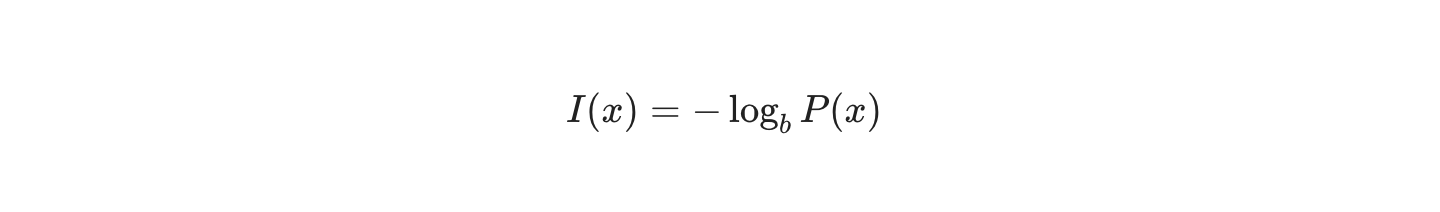

- 이 식은 위의 세 가지 조건을 모두 만족한다. 로그의 밑 $b$에는 주로 2, $e$, 10과 같은 값이 사용되는데, $b=2$인 경우 정보량은 정보를 나타내기 위해 필요한 비트의 개수와 같다. 여기서는 밑이 $e$인 자연로그를 사용해보자. 아래는 $P(x)$의 값에 대한 $-logP(x)$의 그래프다.  \
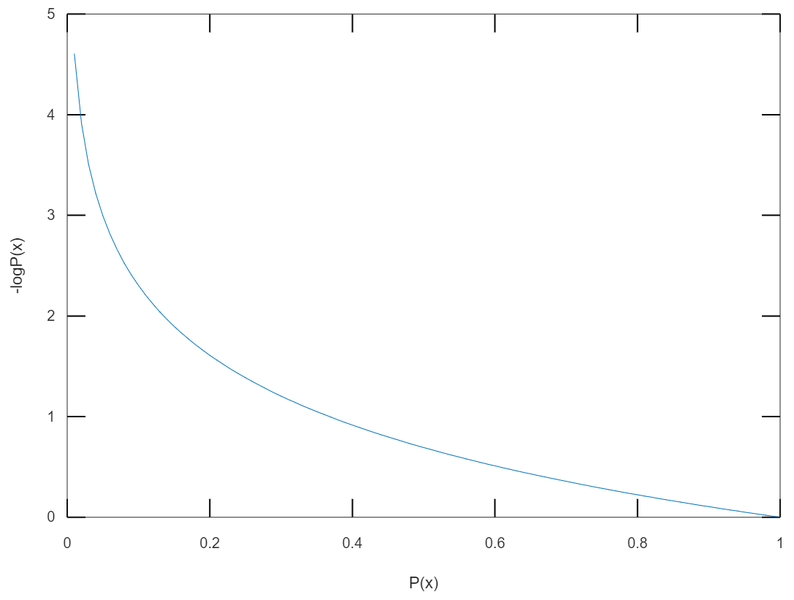

In [1]:
import numpy as np
import math
import random

# 주머니 속에 들어있는 공의 개수. 숫자를 바꿔보며 실험해보자!
total = 1000

count = 1  # 실험이 끝날 때까지 꺼낸 공의 개수

# 1부터 total까지의 정수 중에서 하나를 뽑고 total과 같으면 실험 종료
# total = 1000인 경우 1~999: blue / 1000: red
while True:
    sample = random.randrange(1, total + 1)
    if sample == total:
        break
    count += 1
    
print('number of blue samples: ' + str(count-1))
print('information content: ' + str(-math.log(1/count)))

number of blue samples: 2806
information content: 7.939871576361883


## Entropy
- 정보량은 한 가지 사건에 대한 값이다. 
- 여러 가지 경우의 수가 존재하는 실험의 경우 확률 변수가 가지는 모든 경우의 수에 대해 정보량을 구하고 평균을 내면 확률 변수의 평균적인 정보량을 구할 수 있다. 
- 특정 확률분포를 따르는 사건들의 정보량 기댓값을 **엔트로피(entropy)**라고 한다. 
- 확률 변수가 가질 수 있는 값의 가짓수가 같을 때, 사건들의 확률이 균등할수록 엔트로피 값은 증가한다. (엔트로피의 직관적인 개념인 무질서, 불확실성과도 비슷)
- $X$가 이산 확률 변수일 때 엔트로피는 정보량에 확률을 각각 곱해서 더한 값으로 정의된다.
- $X$가 연속적인 값을 갖는 연속 확률 변수일 때는 유한합 대신 적분의 형태로 정의한다. 이를 **미분 엔트로피**라고 부르기도 한다. 

## Kullback Leibler Divergence
- 머신러닝의 목표는 새로운 입력 데이터가 들어와도 예측이 잘 되도록, 모델의 확률 분포를 데이터의 실제 확률 분포에 가깝게 만드는 것이다. 
- 머신러닝 모델은 크게 두 가지인데, 결정 모델은 데이터의 실제 분포를 모델링하지 않고 결정 경계만을 학습한다. 
- 반면에 생성 모델은 데이터와 모델로부터 도출할 수 있는 여러 확률 분포와 베이즈 이론을 이용해서 데이터의 실제 분포를 간접적으로 모델링한다. 따라서 생성 모델을 학습시킬 때 두 확률 분포의 차이를 나타내는 지표가 필요한데, 대표적인 예가 **쿨백-라이블러 발산(Kullback-Leibler divergence)**이다.  
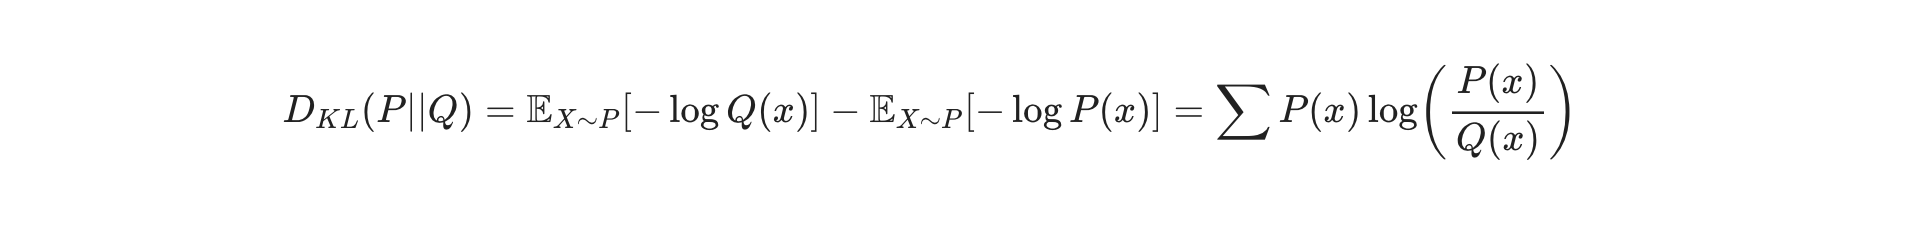

- 데이터가 따르는 실제 확률 분포를 $P(x)$, 모델이 나타내는 확률 분포를 $Q(x)$라고 할때, 두 확률 분포의 KL divergence는 $P(x)$를 기준으로 계산된 $Q(x)$의 평균 정보량과 $P(x)$를 기준으로 계산된 $P(x)$의 평균 정보량의 차이로 정의할 수 있다. 
- 실제 확률 분포 $P(x)$ 대신 근사적인 분포 $Q(x)$를 사용했을 때 발생하는 엔트로피의 변화량을 나타내는 값이다. 
- KL divergence는 두 확률 분포의 차이를 나타내는 값이기 때문에 거리 함수와 비슷한 성질을 갖고 있다. 하지만 기준이 되는 확률 분포가 존재하기 때문에, $P(x)$를 기준으로 했을 때와 $Q(x)$를 기준으로 했을 때의 값은 같지 않다. 
- 머신러닝 문제에서는 두 확률 분포의 차이를 줄여야 하므로 이를 최소화 하는 방향으로 모델을 학습시킨다.  
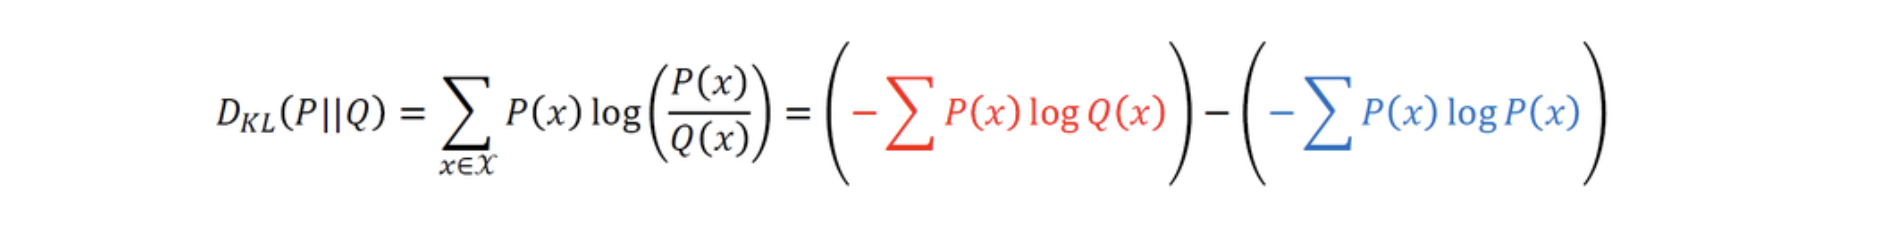

- $P(x)$는 데이터의 실제 분포이므로, 우리가 바꿀 수 없는 고정된 값이다. 
- 우리가 바꿀 수 있는 부분은 $Q(x)$에 관한 식이기 때문에 KL divergence를 최소화하는 문제는 곧 빨간색 부분을 최소화하는 문제다. 
- 이 부분은 $P(x)$를 기준으로 계산한 $Q(x)$의 엔트로피, 즉 $P(x)$에 대한 $Q(x)$의 **교차 엔트로피(cross entropy)**다. 
- 따라서 정답셋의 확률분포 P와 추론 결과의 확률분포 Q의 차이 KL divergence를 최소화, 즉 모델이 추론 결과가 정답셋과 최대한 유사하게 하는 것과 교차 엔트로피를 최소화하는 것이 같다는 것을 확인했다. 교차 엔트로피가 머신러닝에서 어떻게 분류 모델의 loss 함수 역할을 하게 되는지 더 살펴보자. 

## Cross Entropy Loss
- 머신러닝에서 모델이 나타내는 확률 분포와 데이터가 따르는 실제 확률 분포 사이의 차이를 나타내는 함수를 손실 함수(loss function)라고 한다. 
- 모델의 확률 분포는 파라미터에 따라 달려지기 때문에 손실 함수 역시 파라미터에 의해 결정된다. 
- 데이터가 연속적인 값을 갖는 회귀 문제와는 다르게, 이산적인 값을 갖는 분류 문제에서는 모델의 출력 결과가 로지스틱 함수로 표현된다. 분류 클래스가 2개인 로지스틱 함수를 클래스가 n개일 때로 확장한 것이 딥러닝에서도 자주 사용되는 소프트맥스 함수다. 이 함수와 데이터의 확률 분포 차이가 분류 문제의 손실 함수가 된다. 
- 분류 문제에서 데이터의 라벨은 one-hot-encoding을 통해 표현된다. 분류 문제에서는 데이터의 확률 분포가 one-hot-vector로 표현되기 때문에, 이 차이를 cross entropy로 계산할 경우 계산이 간단해지는 장점이 있다.  

아래는 Q(x) 분포가 랜덤하게 생성되었을 때 P(x)를 변형시키면서 cross entropy를 계산해 볼 수 있는 코드다. 

In [2]:
import numpy as np
import random

# generate random output
# can be modified
class_num = 4
q_vector = []
total = 1

for i in range(class_num - 1):
    q = random.uniform(0, total)
    q_vector.append(round(q, 3))
    total = total - q
    
q_vector.append(total)
softmax_output = np.array(q_vector)

print(softmax_output)

[0.61       0.35       0.008      0.03188558]


In [3]:
# P(x)를 생성해 Cross Entropy 계산
# can be modified
class_index = 1

p_vector = np.zeros(class_num)
p_vector[class_index - 1] = 1

cross_entropy = -np.sum(np.multiply(p_vector, np.log(softmax_output)))

print('model prediction: '+str(softmax_output))
print('data label: '+str(p_vector))
print('cross entropy: '+str(round(cross_entropy,4)))

model prediction: [0.61       0.35       0.008      0.03188558]
data label: [1. 0. 0. 0.]
cross entropy: 0.4943


- 모델의 파라미터를 $θ$로 놓으면, 모델이 표현하는 확률 분포는 $Q(y∣X,θ)$로, 데이터의 실제 분포는 $P(y∣X)$로 나타낼 수 있다. 
- $Q(y∣X,θ)$는 데이터셋과 파라미터가 주어졌을 때 예측값의 분포를 나타내므로 모델의 likelihood와 같다.  
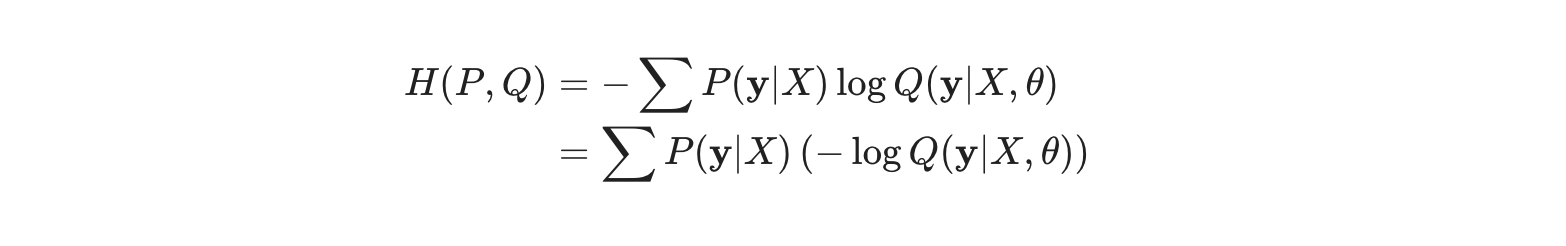

- $X$와 $y$는 데이터셋에 의해 결정되는 값이므로 바꿀 수 있는 부분은 $-logQ(y∣X,θ)$뿐이다. 그러므로 cross entropy를 최소화하는 파라미터를 구하는 것은 결국 negative log likelihood를 최소화하는 파라미터를 구하는 것과 같다!

## Decision Tree와 Entropy
- 엔트로피 개념이 활발하게 쓰이는 분야 중 하나는 의사결정나무(Decision Tree) 계열의 모델일 것이다. 
- 의사결정 트리는 갖고 있는 데이터에서 어떤 기준으로 전체 데이터를 나눴을 때 나누기 전보다 엔트로피가 감소하는지를 따져서, 엔트로피가 감소하면 그만큼 모댈 내부에 정보 이득(Information Gain)을 얻었다고 보는 관점이다. 엔트로피 증가가 정보 손실량이라고 정의하는 것의 반대 관점이다. 

In [4]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [5]:
import os
csv_path = os.getenv('HOME')+'/aiffel/information_theory/diabetes.csv'

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
df = pd.read_csv(csv_path, header=0, names=col_names)
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# 데이터셋 준비
feature_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']
X = df[feature_cols] # Features
y = df.label # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [7]:
# Decision Tree  모델 학습
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.670995670995671


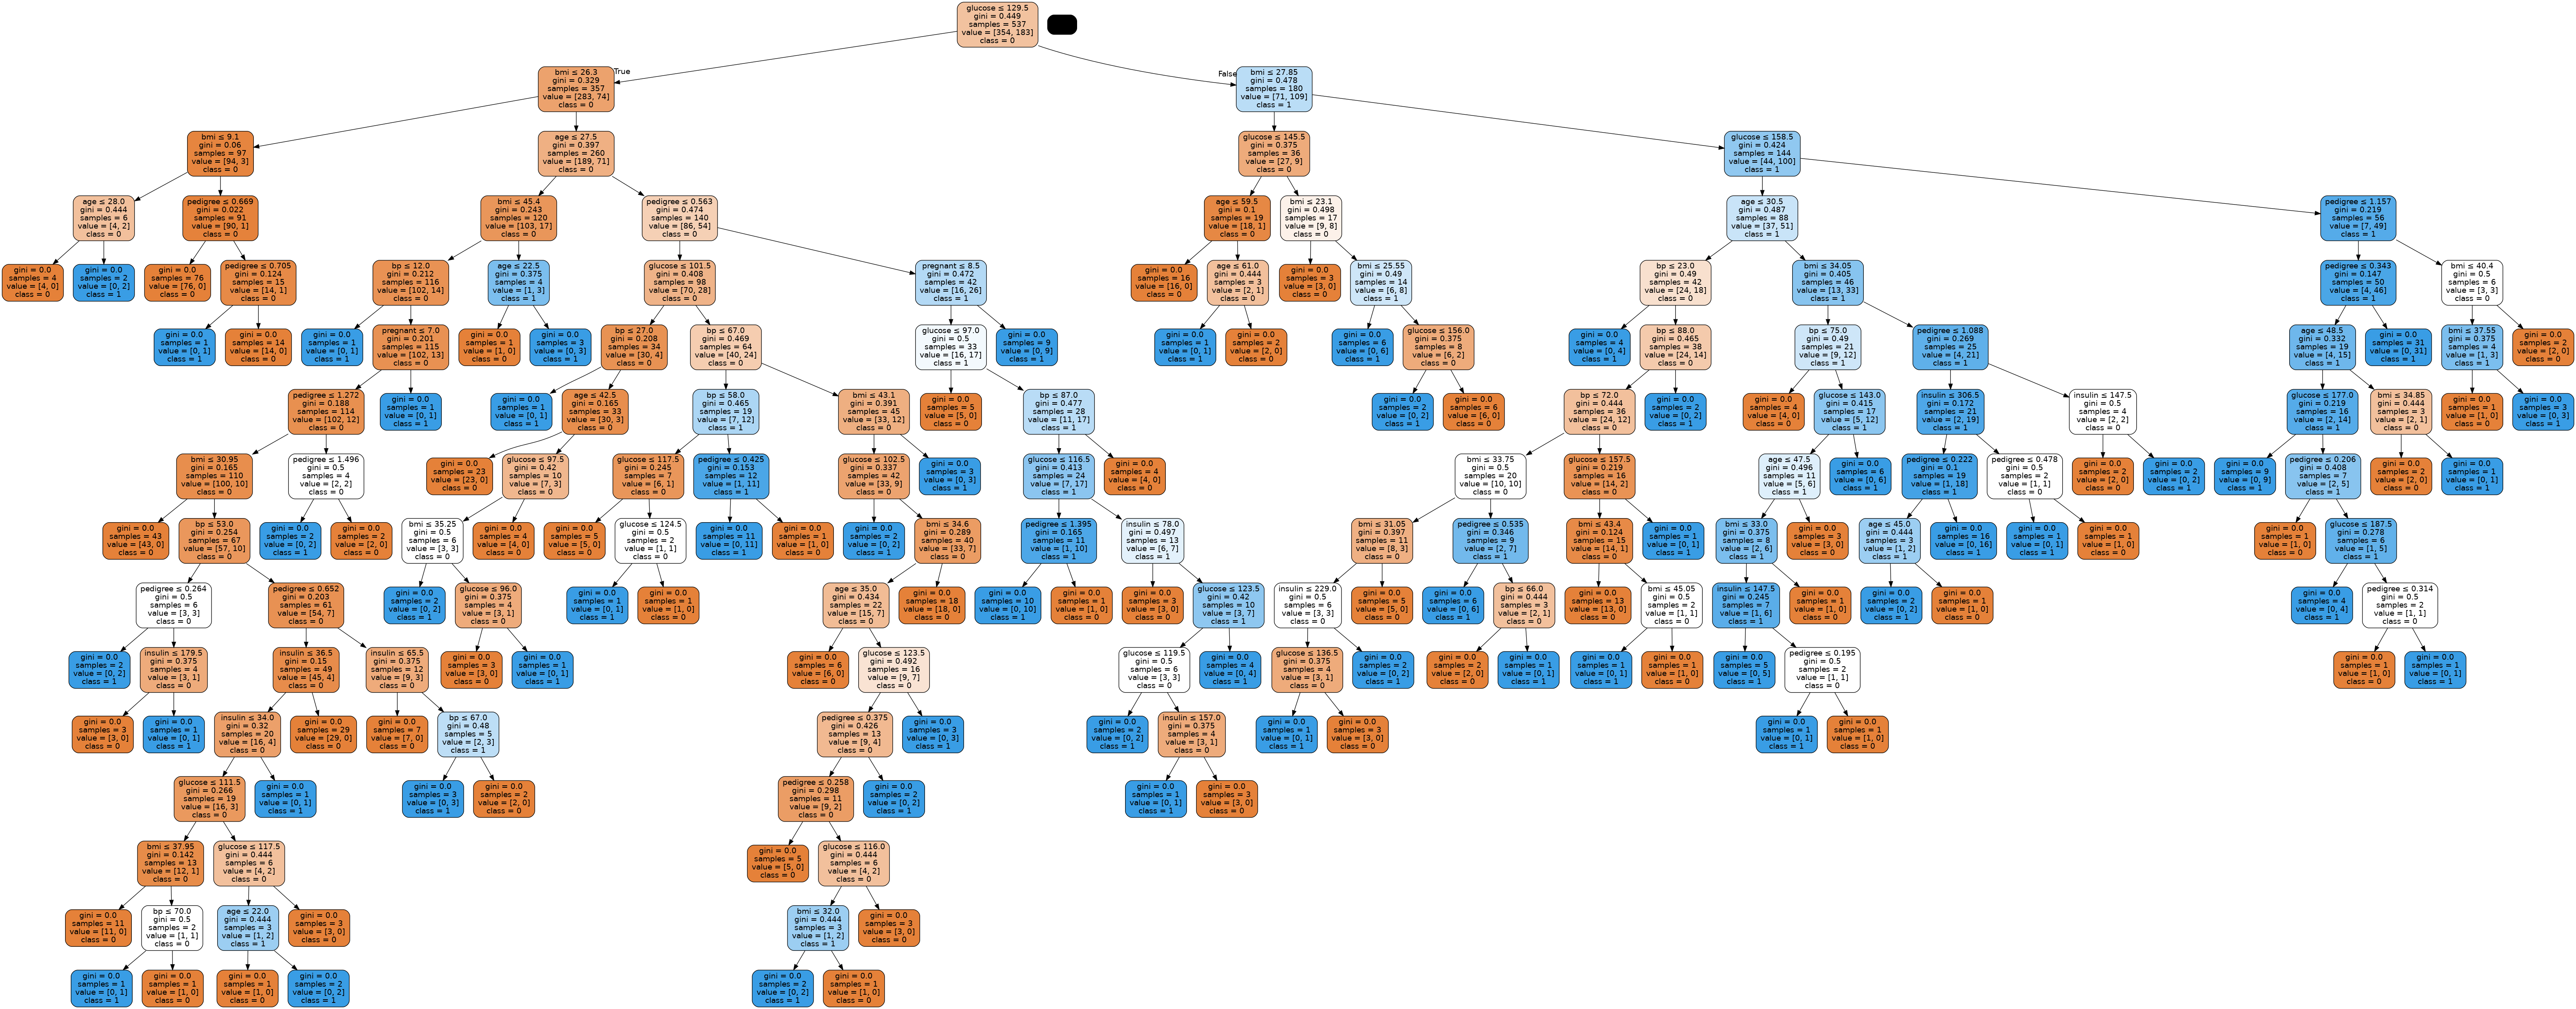

In [8]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, 
                out_file=dot_data,  
                filled=True, 
                rounded=True,
                special_characters=True, 
                feature_names=feature_cols, 
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes1.png')
Image(graph.create_png(), retina=True)

In [9]:
# 정보 이득이 되지 않고 남은 Impurity  총량 측정
ccp_path1 = clf.cost_complexity_pruning_path(X_train,y_train)
ccp_path2 = clf.cost_complexity_pruning_path(X_test,y_test)
print(np.mean(ccp_path1.impurities))
print(np.mean(ccp_path2.impurities))

0.1550418448388093
0.14463309851254125


In [10]:
# 비교 실험 : 3depth까지만 발전
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


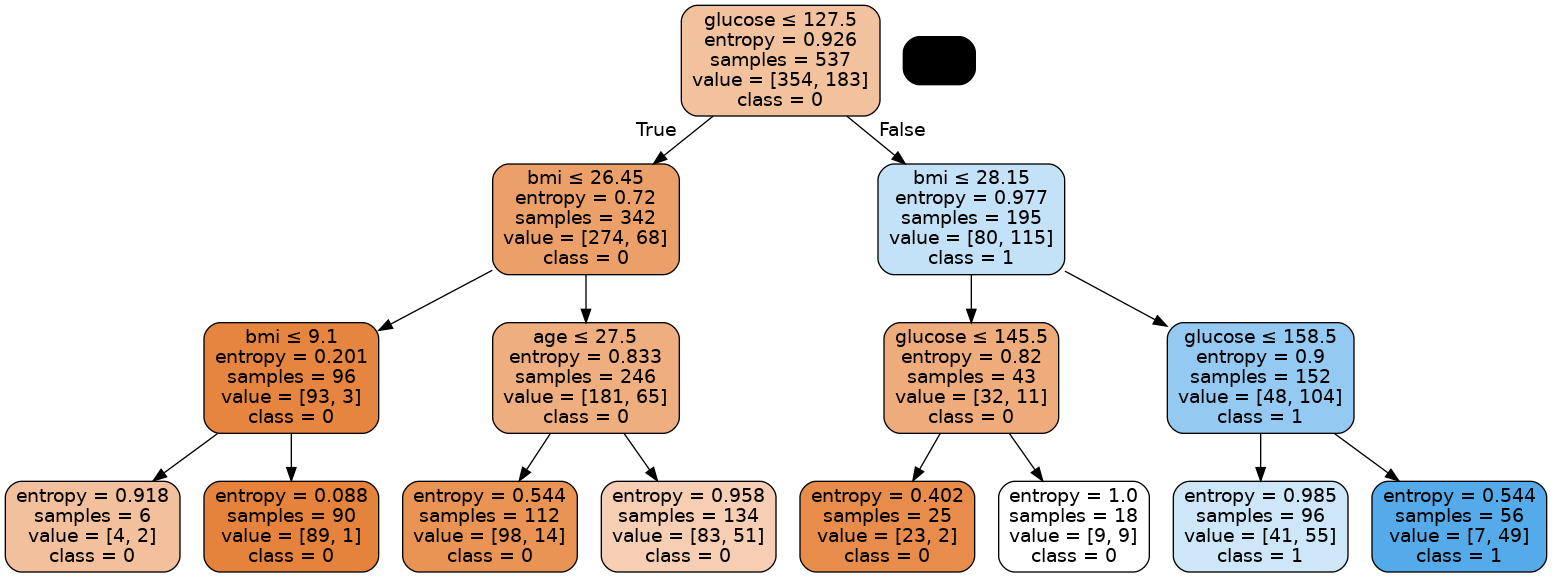

In [11]:
dot_data = StringIO()
export_graphviz(clf, 
                out_file=dot_data,  
                filled=True, 
                rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes2.png')
Image(graph.create_png(), retina=True)

In [12]:
# 정보이득이 되지 않고 남은 Impurity  총량 측정
ccp_path1 = clf.cost_complexity_pruning_path(X_train,y_train)
ccp_path2 = clf.cost_complexity_pruning_path(X_test,y_test)
print(np.mean(ccp_path1.impurities))
print(np.mean(ccp_path2.impurities))

0.7474881472739515
0.6878691771636323


- 엔트로피 기준으로는 더욱 정보 이득을 얻을 수 있음에도 불구하고 분류 기준을 더 세우지 않는 것이 전체 모델의 정확도 향상에 낫다. 
- 무한정 기준을 쪼개서 엔트로피를 떨어뜨릴 수 있지만, 그것은 오버피팅된다. 
- 다양한 분류 기준을 가진 의사결정 트리 여러 개를 앙상블한 RandomForest 모델은 이 문제점을 극복하고 훌륭한 성능을 보일 수 있다. 